In [1]:
%load_ext autoreload
%autoreload 2

import sys  

sys.path.insert(0, 'functions')
sys.path.insert(0, 'training')

In [2]:
import matplotlib
import matplotlib as mpl

In [3]:
#from Clusterer import *
from plotting import *
from data_functions import *
import pandas as pd
import numpy as np
import compress_pickle as pickle  
import glob, re, os

time_TH=150
MIP=0.0006 ## GeV
MIP_TH=0.5 * MIP

/usr/workspace/sinha4/anaconda.2/envs/opence-1.8.0.2/lib/python3.9/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):


In [4]:
generate_file_name_dict

<function plotting.generate_file_name_dict(input_dims, latent_sizes, num_layers, learning_rates, folders_used, data_types, labels, particles)>

In [5]:
loaded_dict = {}
loaded_dict['plot_k'] = '/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230714_base_k_10'
path=loaded_dict['plot_k']
print(path)

/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230714_base_k_10


In [12]:
data_dirs = []
regex = r'Block_20230713_*' #Block_20230630_, Block_20230708_, Block_20230710 , Block_20230713_
#DIR= '/usr/workspace/sinha4/regressiononly/savemodel3/' # savemodel_hcal_only
DIR= '/usr/workspace/sinha4/regressiononly/savemodel_hcal_only/'

for x in os.listdir(DIR):
    if re.match(regex, x):
        print(x)

Block_20230713_base_k_10
Block_20230713_1_k_10
Block_20230713_2_k_10
Block_20230713_0_k_10
Block_20230713_3_k_10
Block_20230713_4_k_10
Block_20230713_5_k_10
Block_20230713_6_k_10
Block_20230713_10_k_10
Block_20230713_8_k_10
Block_20230713_9_k_10
Block_20230713_7_k_10
Block_20230713_11_k_10
Block_20230713_12_k_10
Block_20230713_13_k_10
Block_20230713_14_k_10
Block_20230713_15_k_10
Block_20230713_16_k_10
Block_20230713_17_k_10
Block_20230713_18_k_10
Block_20230713_24_k_10
Block_20230713_20_k_10
Block_20230713_22_k_10
Block_20230713_25_k_10
Block_20230713_23_k_10
Block_20230713_19_k_10
Block_20230713_21_k_10
Block_20230713_26_k_10
Block_20230713_6_k_5
Block_20230713_18_k_5
Block_20230713_13_k_5
Block_20230713_10_k_5
Block_20230713_14_k_5
Block_20230713_19_k_5
Block_20230713_22_k_5
Block_20230713_24_k_5
Block_20230713_12_k_5
Block_20230713_25_k_5
Block_20230713_23_k_5
Block_20230713_7_k_5
Block_20230713_4_k_5
Block_20230713_8_k_5
Block_20230713_3_k_5
Block_20230713_16_k_5
Block_20230713_0_

In [6]:
import yaml

def load_yaml_file(yaml_file_path):
    with open(yaml_file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data

import glob, re, os

data_dirs = []
regex = r'Block_20230714_base_k_10' #Block_20230630_, Block_20230708_, Block_20230710_
DIR= '/usr/workspace/sinha4/regressiononly/savemodel3/' # savemodel_hcal_only
DIR= '/usr/workspace/sinha4/regressiononly/savemodel_hcal_only/'

name = []
block = []
layer = []
k = []
test_l = []
lat = []
ind = []
i = 0

for x in os.listdir(DIR):
    if re.match(regex, x):
        
        print(x)
        ind.append(i)
        
        path_z = DIR+x
        
        try:
            npz_unpacked_loss = np.load(path_z+"/test_loss.npz")
            test_loss = npz_unpacked_loss['test']
            zz = np.mean(test_loss)
            test_l.append(zz)
        except:
            print('error')
            print('err',path_z)
            print('i',i)
            #print('latent_size_z',latent_size_z)
            continue #test_l.append(0) # or test_l.append(float('inf'))
        
        path_x = DIR + x + '/config.yaml'
        
        # Specify the path to your YAML file
        yaml_file_path = path_x

        # Load the YAML file and retrieve the dictionary
        dictionary = load_yaml_file(yaml_file_path)

        # Access and print the dictionary
        #print(dictionary)
        data_config = (dictionary['data'])
        model_config = (dictionary['model'])
        train_config = (dictionary['training'])

        k_z = data_config['k']
        k.append(k_z)
        num_blocks_z = model_config['num_blocks']
        block.append(num_blocks_z)
        num_layers_z = model_config['num_layers']
        layer.append(num_layers_z)
        latent_size_z = model_config['latent_size']
        lat.append(latent_size_z)
        
        i+=1
            

Block_20230714_base_k_10
error
err /usr/workspace/sinha4/regressiononly/savemodel_hcal_only/Block_20230714_base_k_10
i 0


In [8]:
import pandas as pd

# Sample data
my_list = [ind, block , layer , k , test_l , lat]

data = pd.DataFrame({'block': block, 'layer': layer, 'k': k, 'lat': lat, 'test_l':test_l})
# Creating a DataFrame
#df = pd.DataFrame(my_list, columns=['ind', 'block' , 'layer' , 'k', 'test_l' , 'lat'])

# Printing the DataFrame
print(data)

Empty DataFrame
Columns: [block, layer, k, lat, test_l]
Index: []


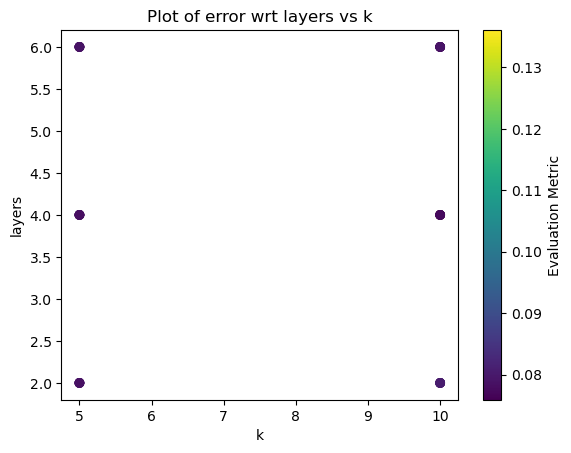

In [15]:
plt.scatter(data['k'], data['layer'], c=data['test_l'])
plt.colorbar(label='Evaluation Metric')
plt.xlabel('k')
plt.ylabel('layers')
plt.title('Plot of error wrt layers vs k')

mpl.rcParams['figure.dpi']= 300
plt.show()


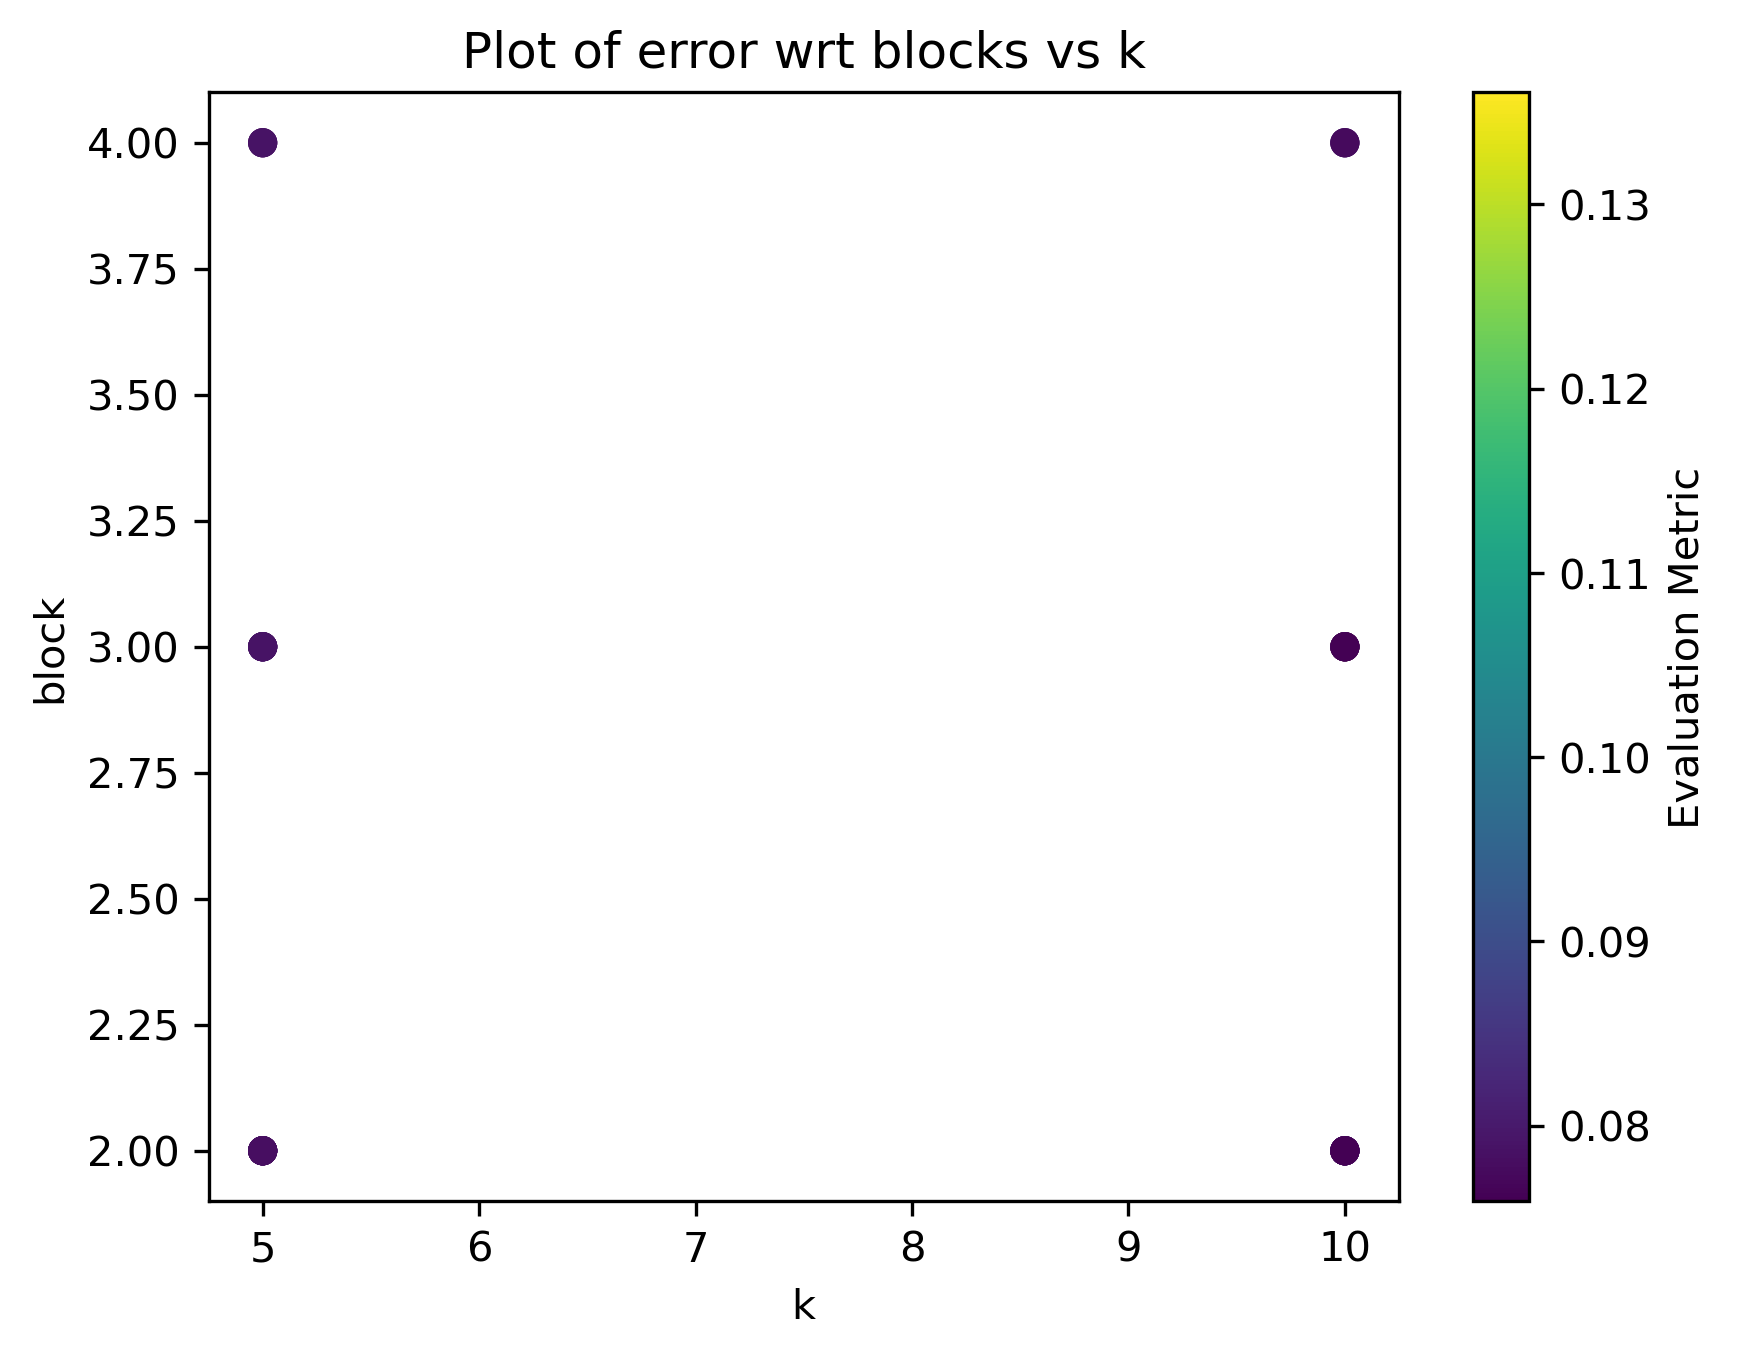

In [22]:
plt.scatter(data['k'], data['block'], c=data['test_l'])
plt.colorbar(label='Evaluation Metric')
plt.xlabel('k')
plt.ylabel('block')
plt.title('Plot of error wrt blocks vs k')

mpl.rcParams['figure.dpi']= 300
plt.show()


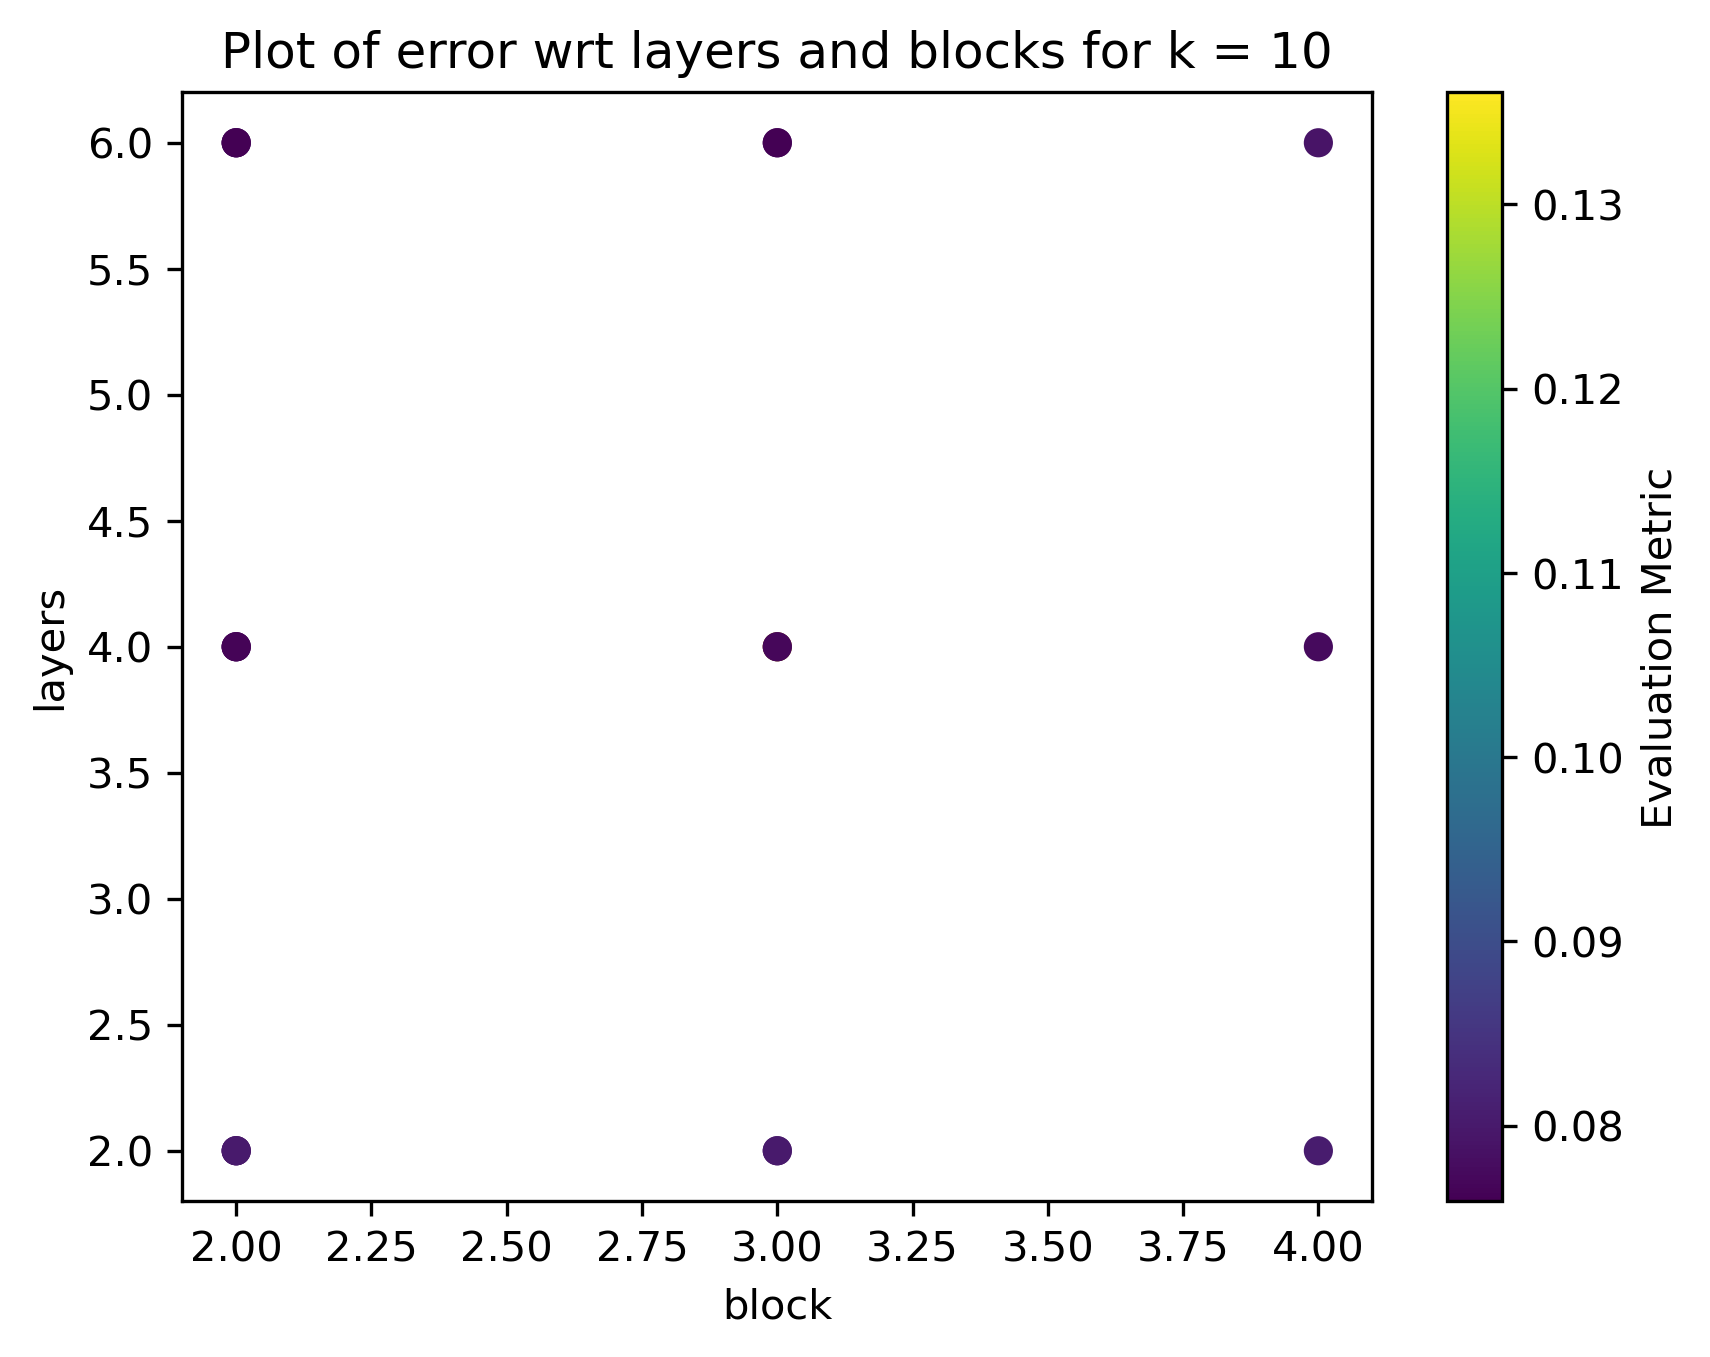

In [23]:
df = data
filtered_df = df[df['k'] == 10]

plt.scatter(filtered_df['block'], filtered_df['layer'], c=filtered_df['test_l'])
plt.colorbar(label='Evaluation Metric')
plt.xlabel('block')
plt.ylabel('layers')
plt.title('Plot of error wrt layers and blocks for k = 10')

mpl.rcParams['figure.dpi']= 300
plt.show()


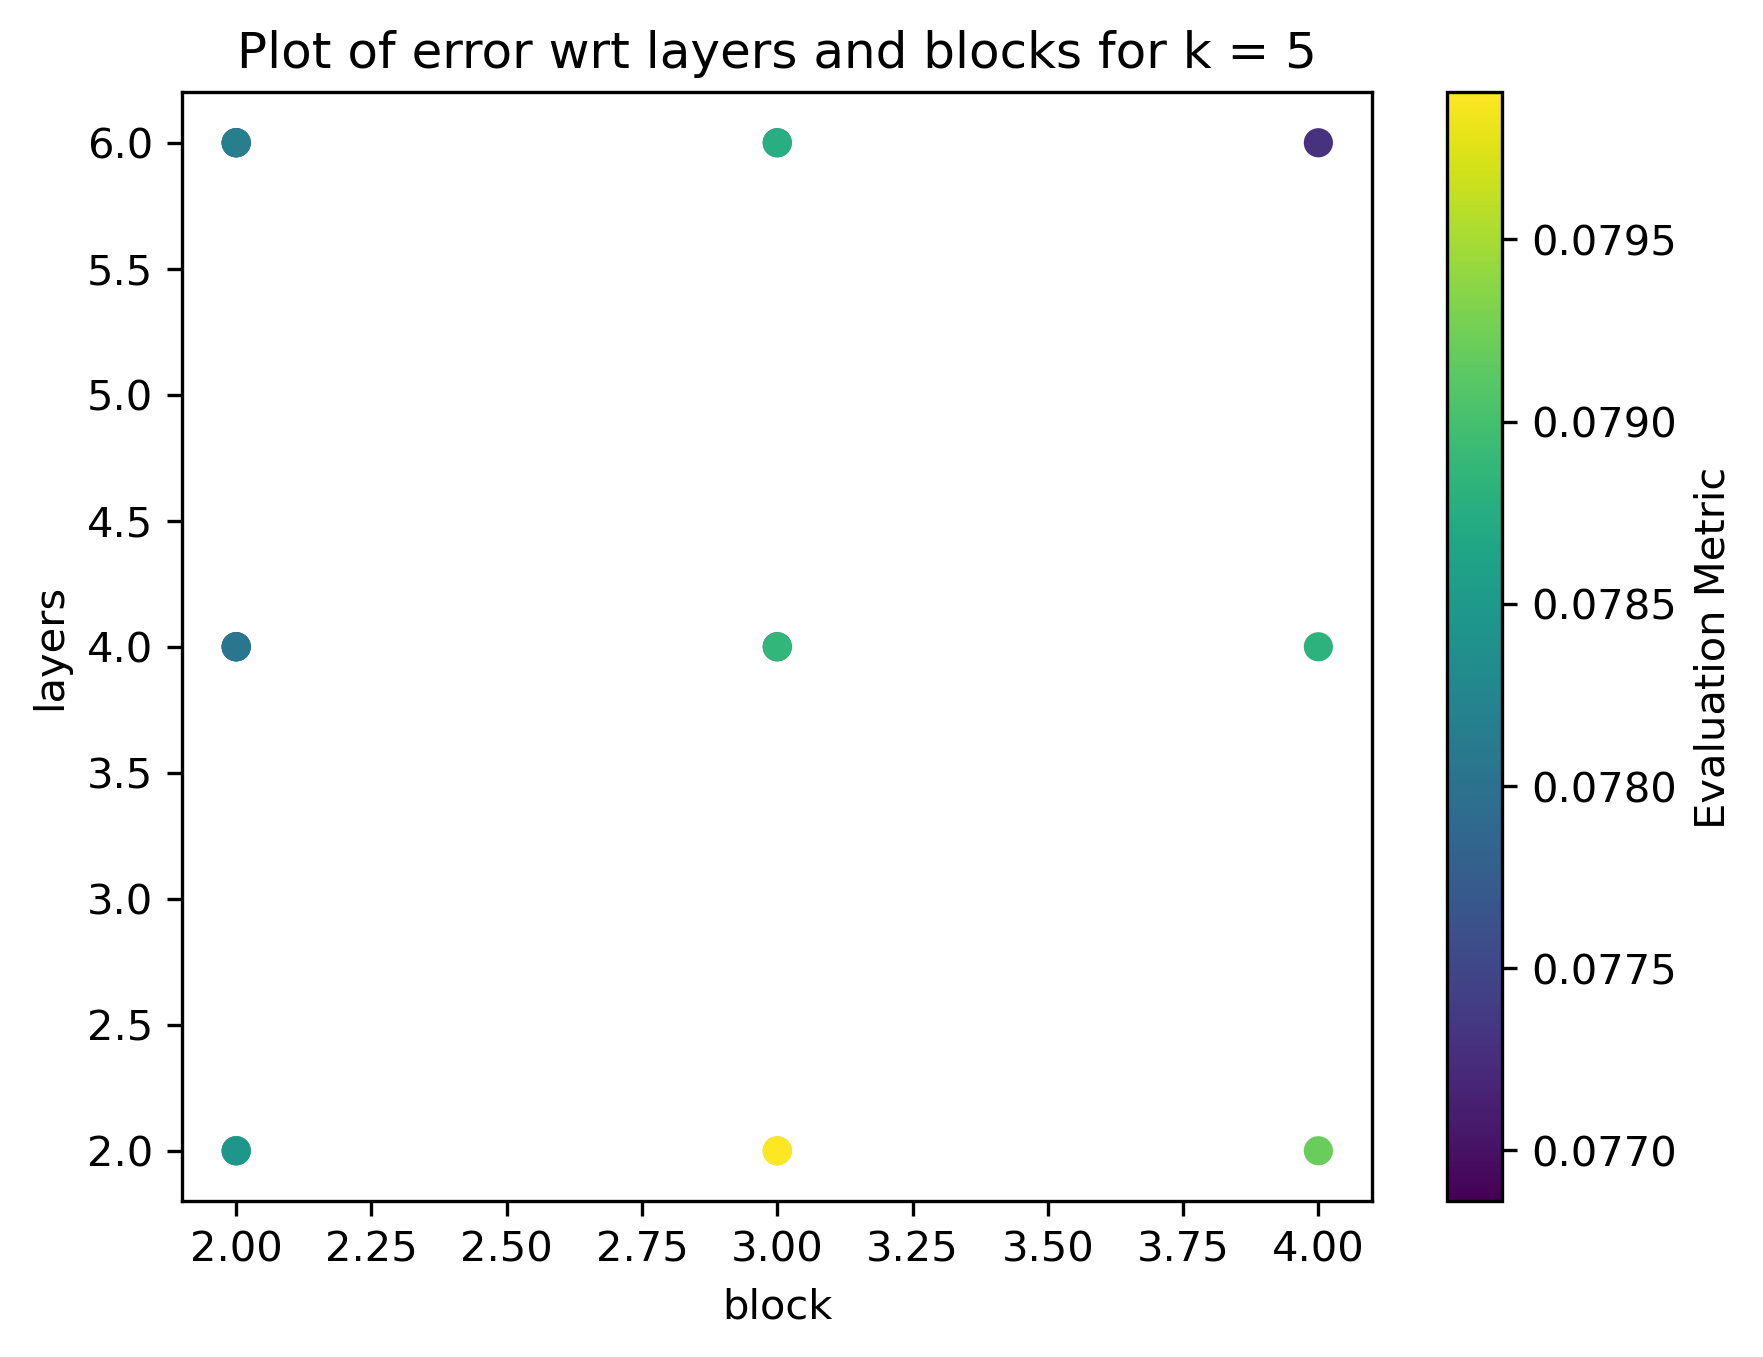

In [21]:
df = data
filtered_df = df[df['k'] == 5]

plt.scatter(filtered_df['block'], filtered_df['layer'], c=filtered_df['test_l'])
plt.colorbar(label='Evaluation Metric')
plt.xlabel('block')
plt.ylabel('layers')
plt.title('Plot of error wrt layers and blocks for k = 5')

mpl.rcParams['figure.dpi']= 300
plt.show()


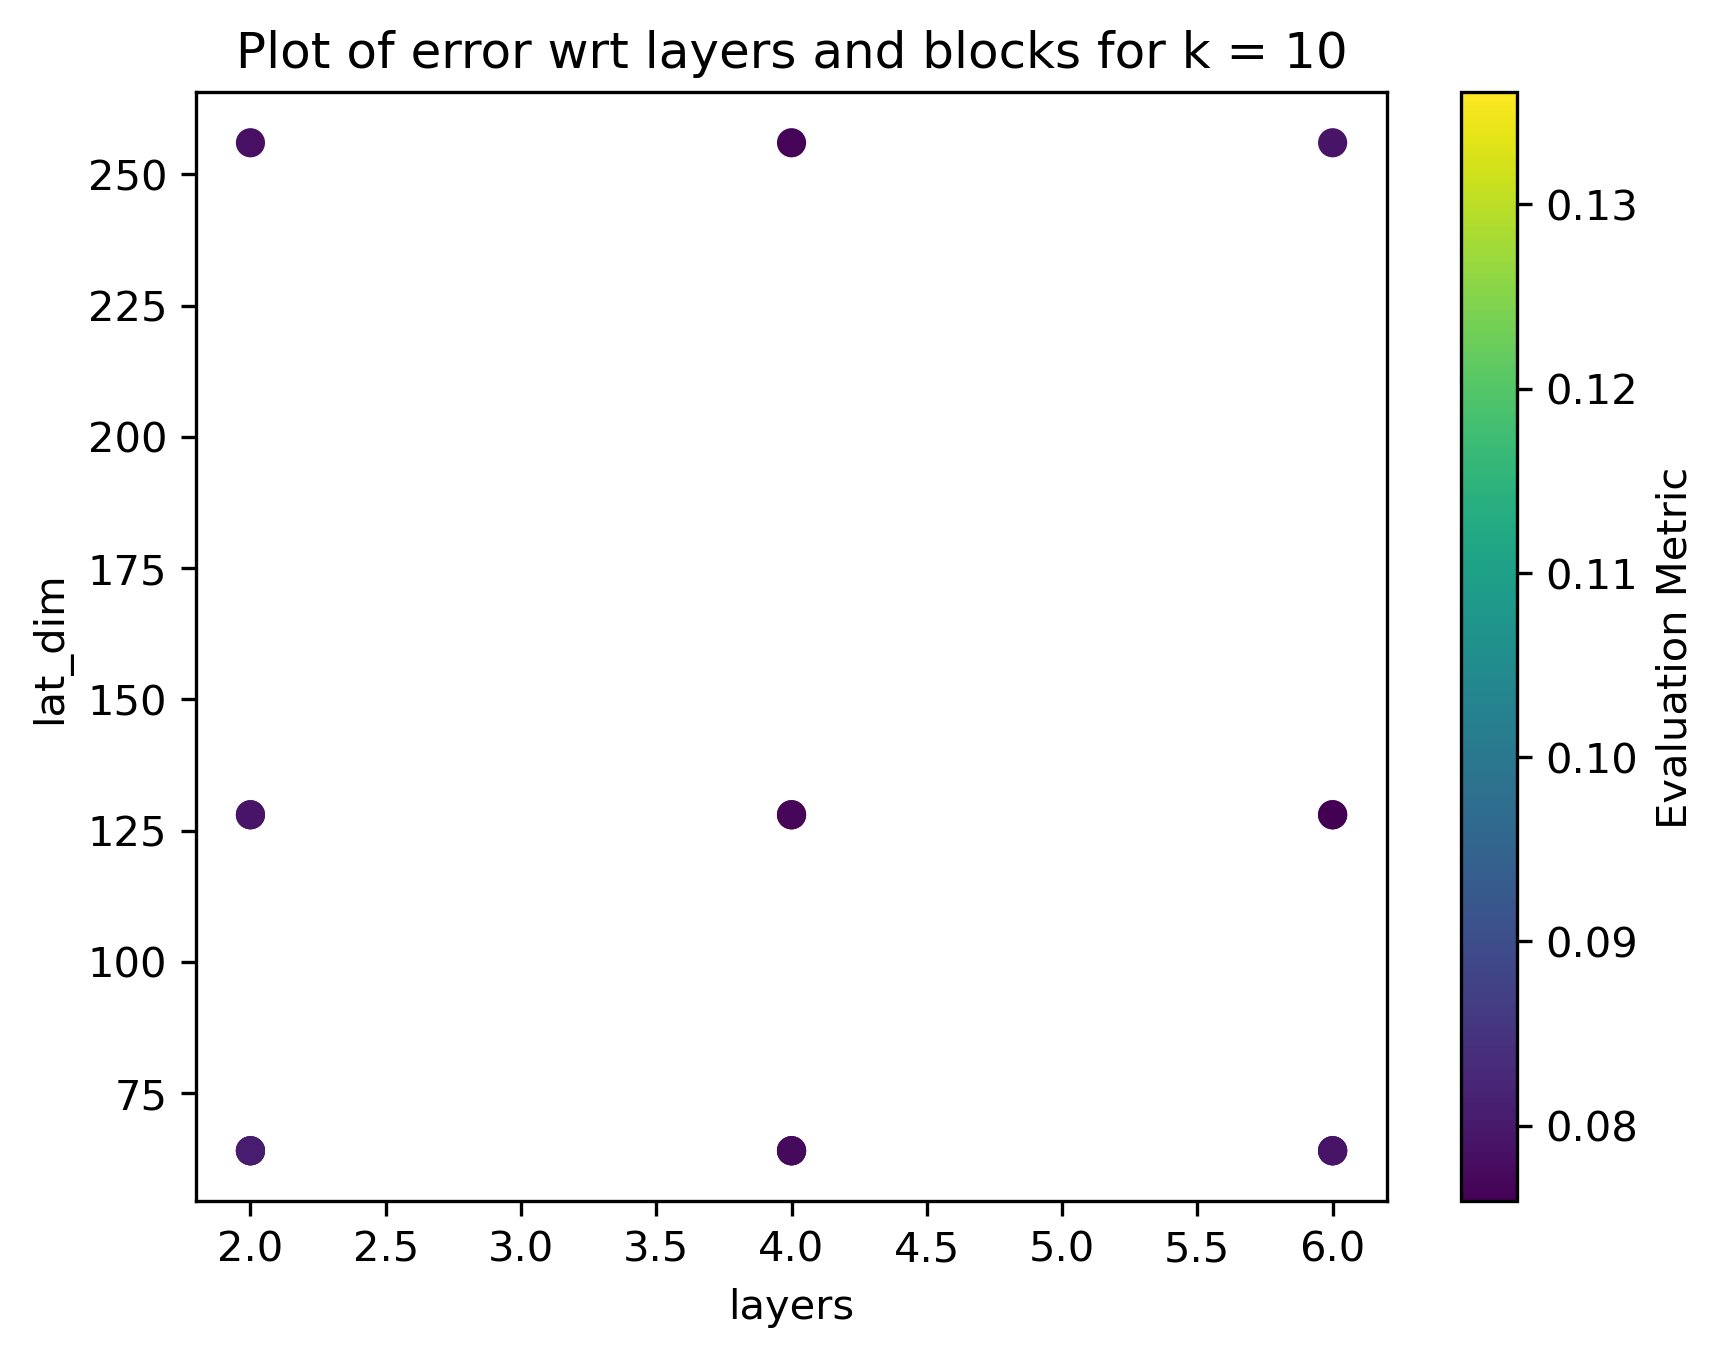

In [20]:
df = data
filtered_df = df[df['k'] == 10]

plt.scatter(filtered_df['layer'], filtered_df['lat'], c=filtered_df['test_l'])
plt.colorbar(label='Evaluation Metric')
plt.xlabel('layers')
plt.ylabel('lat_dim')
plt.title('Plot of error wrt layers and blocks for k = 10')

mpl.rcParams['figure.dpi']= 300
plt.show()


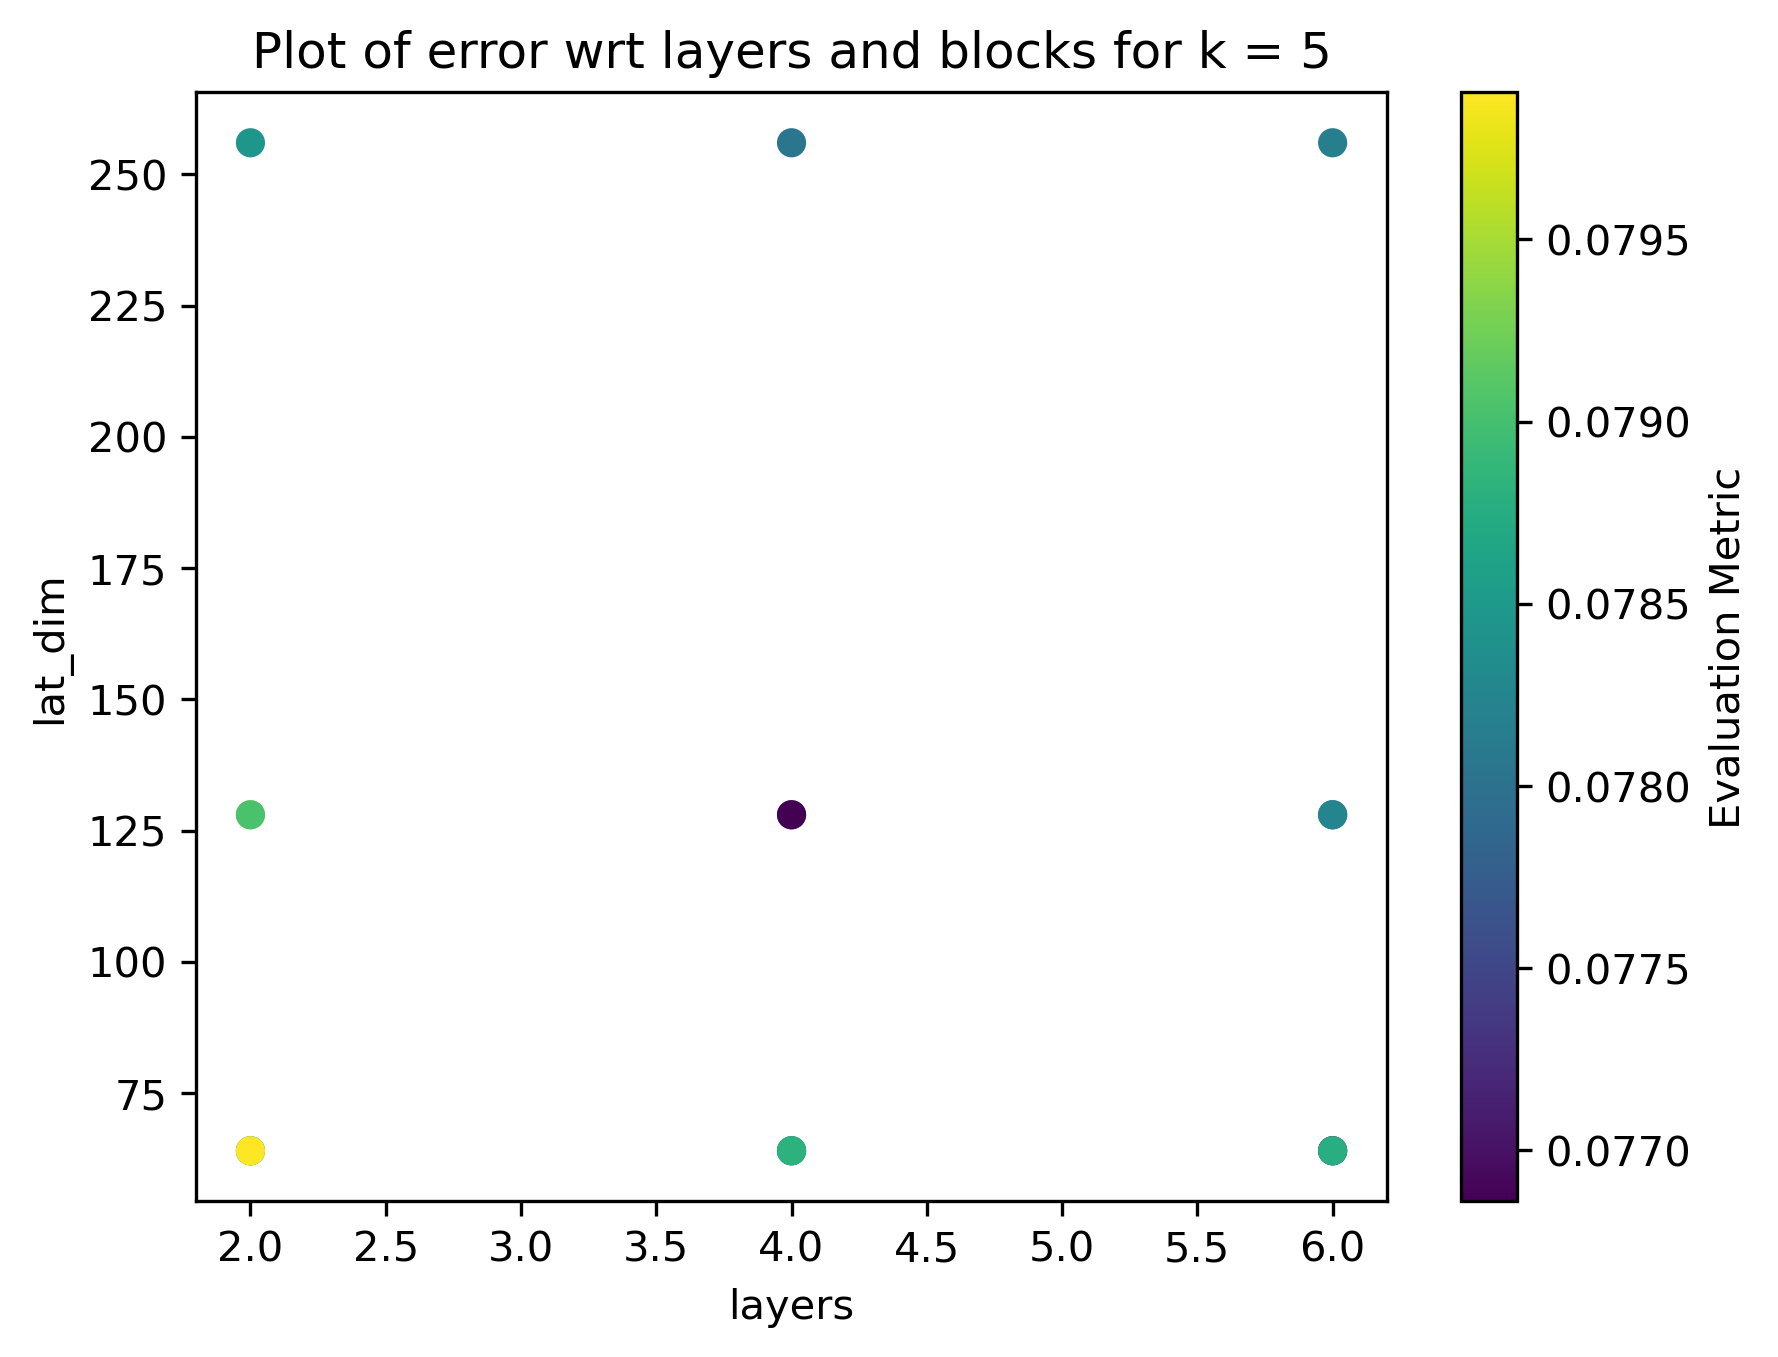

In [19]:
df = data
filtered_df = df[df['k'] == 5]

plt.scatter(filtered_df['layer'], filtered_df['lat'], c=filtered_df['test_l'])
plt.colorbar(label='Evaluation Metric')
plt.xlabel('layers')
plt.ylabel('lat_dim')
plt.title('Plot of error wrt layers and blocks for k = 5')

mpl.rcParams['figure.dpi']= 300
plt.show()


In [7]:
result_paths=[]

key = 'plot_k'
path=loaded_dict[key]
result_paths.append(path)
result_paths.append(path)

print(result_paths) 

['/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230714_base_k_10', '/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230714_base_k_10']


In [8]:
path

'/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230714_base_k_10'

In [23]:
def Plot_Loss_Curve(loss,val_loss,label,loss_string):

    fig,axes = plt.subplots(1,1,figsize=(14,10))
    axes = [axes,axes] #easier to add axes later, if need be
    axes[0].plot(loss,label="loss")
    axes[0].plot(val_loss,label="val_loss")
    axes[0].set_title('Model Loss vs. Epoch',fontsize=26)

    axes[0].set_ylabel(f'Loss ({loss_string})',fontsize=22)

    axes[0].set_xlabel('Epoch',fontsize=22)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    axes[0].set_xlim([-1,101])
    #axes[0].set_ylim(0.06,0.525)
    
    axes[0].legend(['train', 'validation'], loc='upper right',fontsize=22)
    plt.savefig(f"{label}/ROOT_Correlation.png")

In [18]:
npz_unpacked_loss = np.load(path+"/test_loss.npz")
test_loss = npz_unpacked_loss['test']

print(np.mean(test_loss))

0.19166397


In [20]:
Plot_Loss_Curve

<function plotting.Plot_Loss_Curve(loss, val_loss, label, loss_string)>

In [21]:
npz_unpacked_loss = np.load(path+"/losses.npz")
loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']

In [25]:
loss[0]

array([1.5555679 , 2.6313324 , 0.8338178 , ..., 0.08853415, 0.0806783 ,
       0.0809745 ], dtype=float32)

In [26]:
len(loss)

61

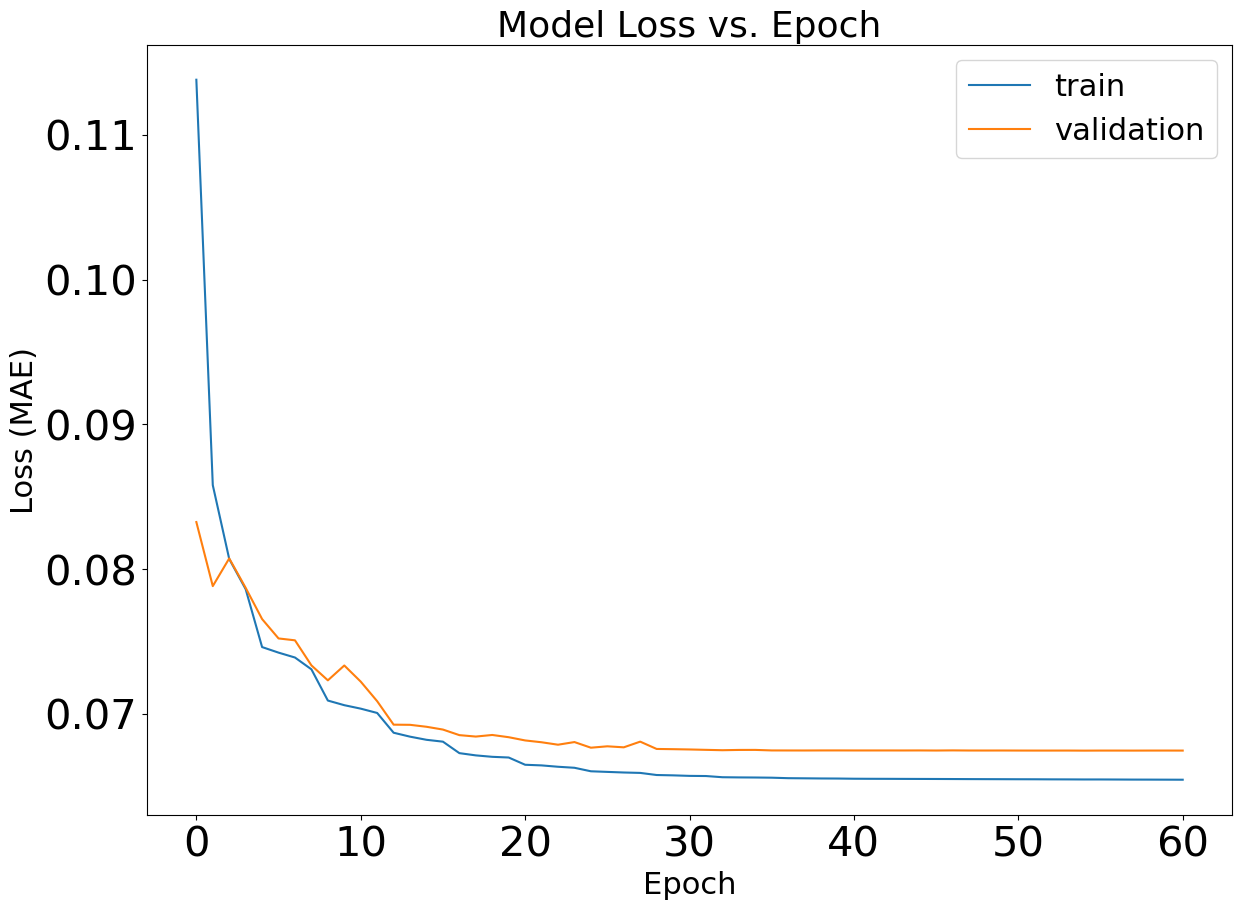

In [28]:
#print(path)
path = '/usr/workspace/sinha4/regressiononly/savemodel_hcal_only/Block_20230714_base_k_10'

npz_unpacked_loss = np.load(path+"/losses.npz")
loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']

# change: end of epoch loss (loss of the )

Plot_Loss_Curve(np.mean(loss, axis=1),np.mean(val_loss, axis=1),path,loss_string="MAE") #label loss yourself here

## Contour plot

In [12]:
take_log10 = False
path_to_result_dir= '/usr/workspace/sinha4/regressiononly/output'
#path_to_result_dir = '/usr/workspace/sinha4/regressiononly/savemodel_hcal_only/Block_20230714_base_k_10'
npz_unpacked = np.load(path+"/predictions.npz") # predictions.npz , test_predictions.npz

predictions = npz_unpacked['outputs']
targets = npz_unpacked['targets']

means = pickle.load(open(f"{path_to_result_dir}/means.p", 'rb'), compression='gzip')
stdvs = pickle.load(open(f"{path_to_result_dir}/stdvs.p", 'rb'), compression='gzip')

print(means)

means.keys()

predictions = predictions*stdvs['genP'] + means['genP']
targets = targets*stdvs['genP'] + means['genP']

predictions = 10**predictions
targets = 10**targets


ClusterSum = predictions
GenP = targets

{'.energy': -2.7900622824709185, '.position.z': 4319.800286514109, '.position.x': -97.04578883113258, '.position.y': 0.220222026623468, 'clusterE': 1.3879416470398318, 'genP': 1.0597205281575521}


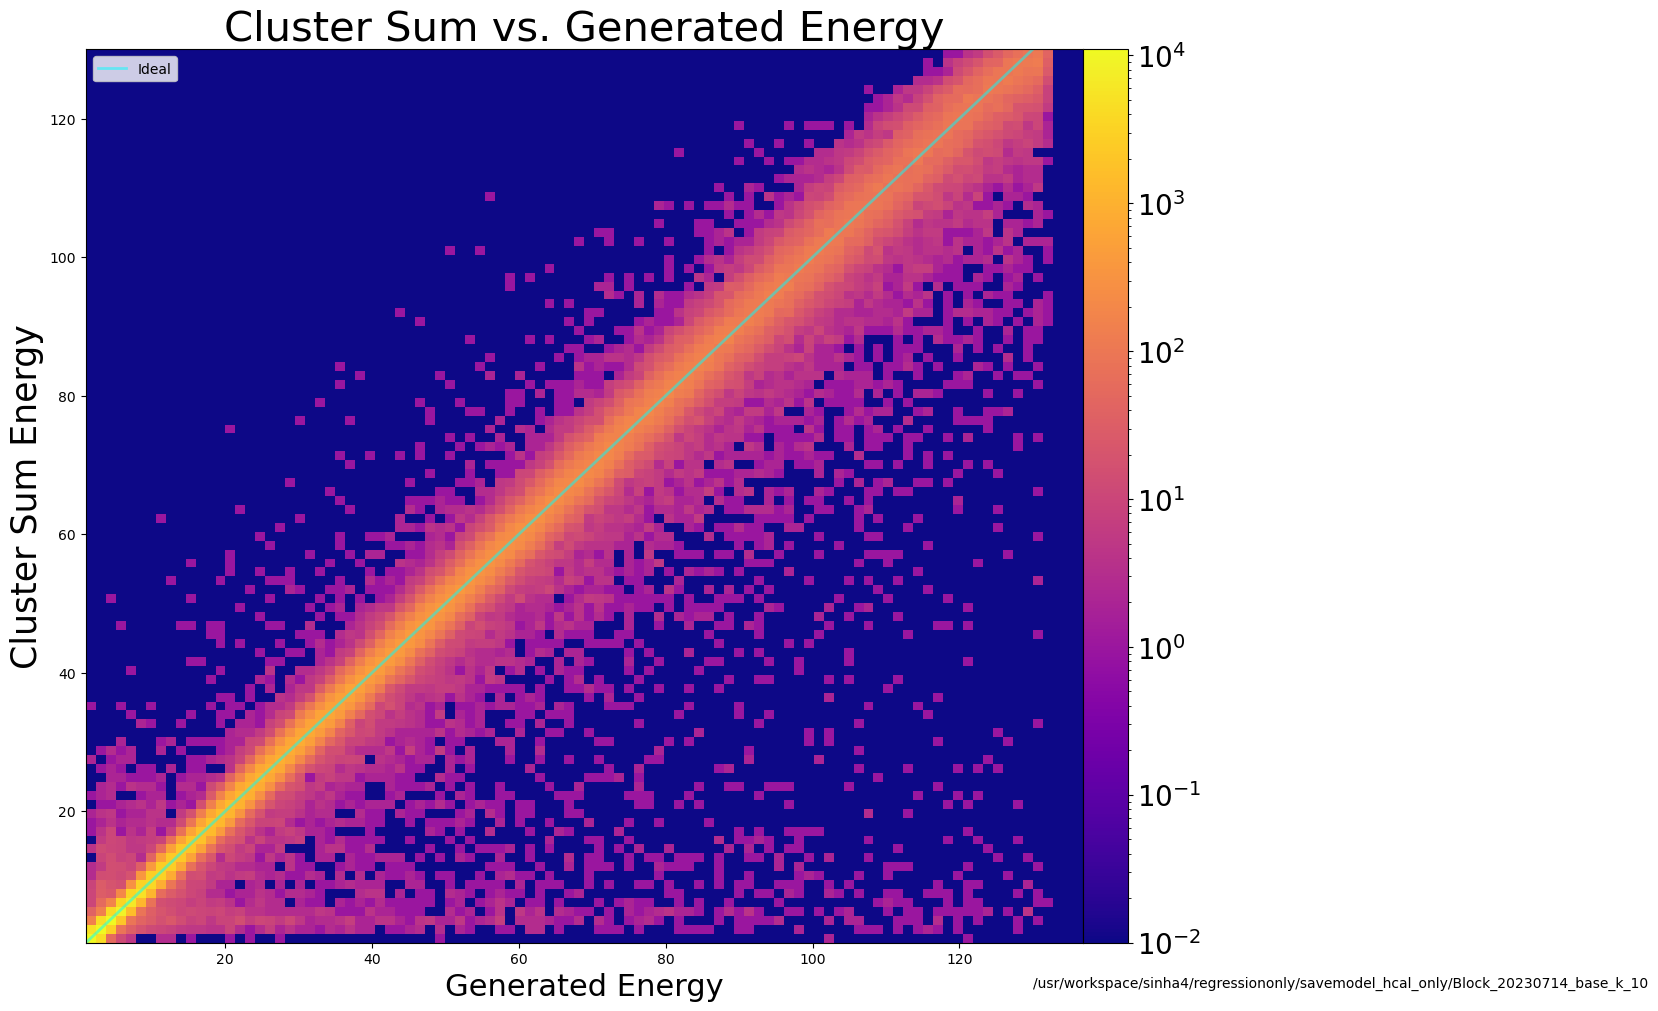

In [13]:
ClusterSum_vs_GenP(ClusterSum, GenP, path, take_log10)

In [ ]:
get_res_scale_fit_log10_log2

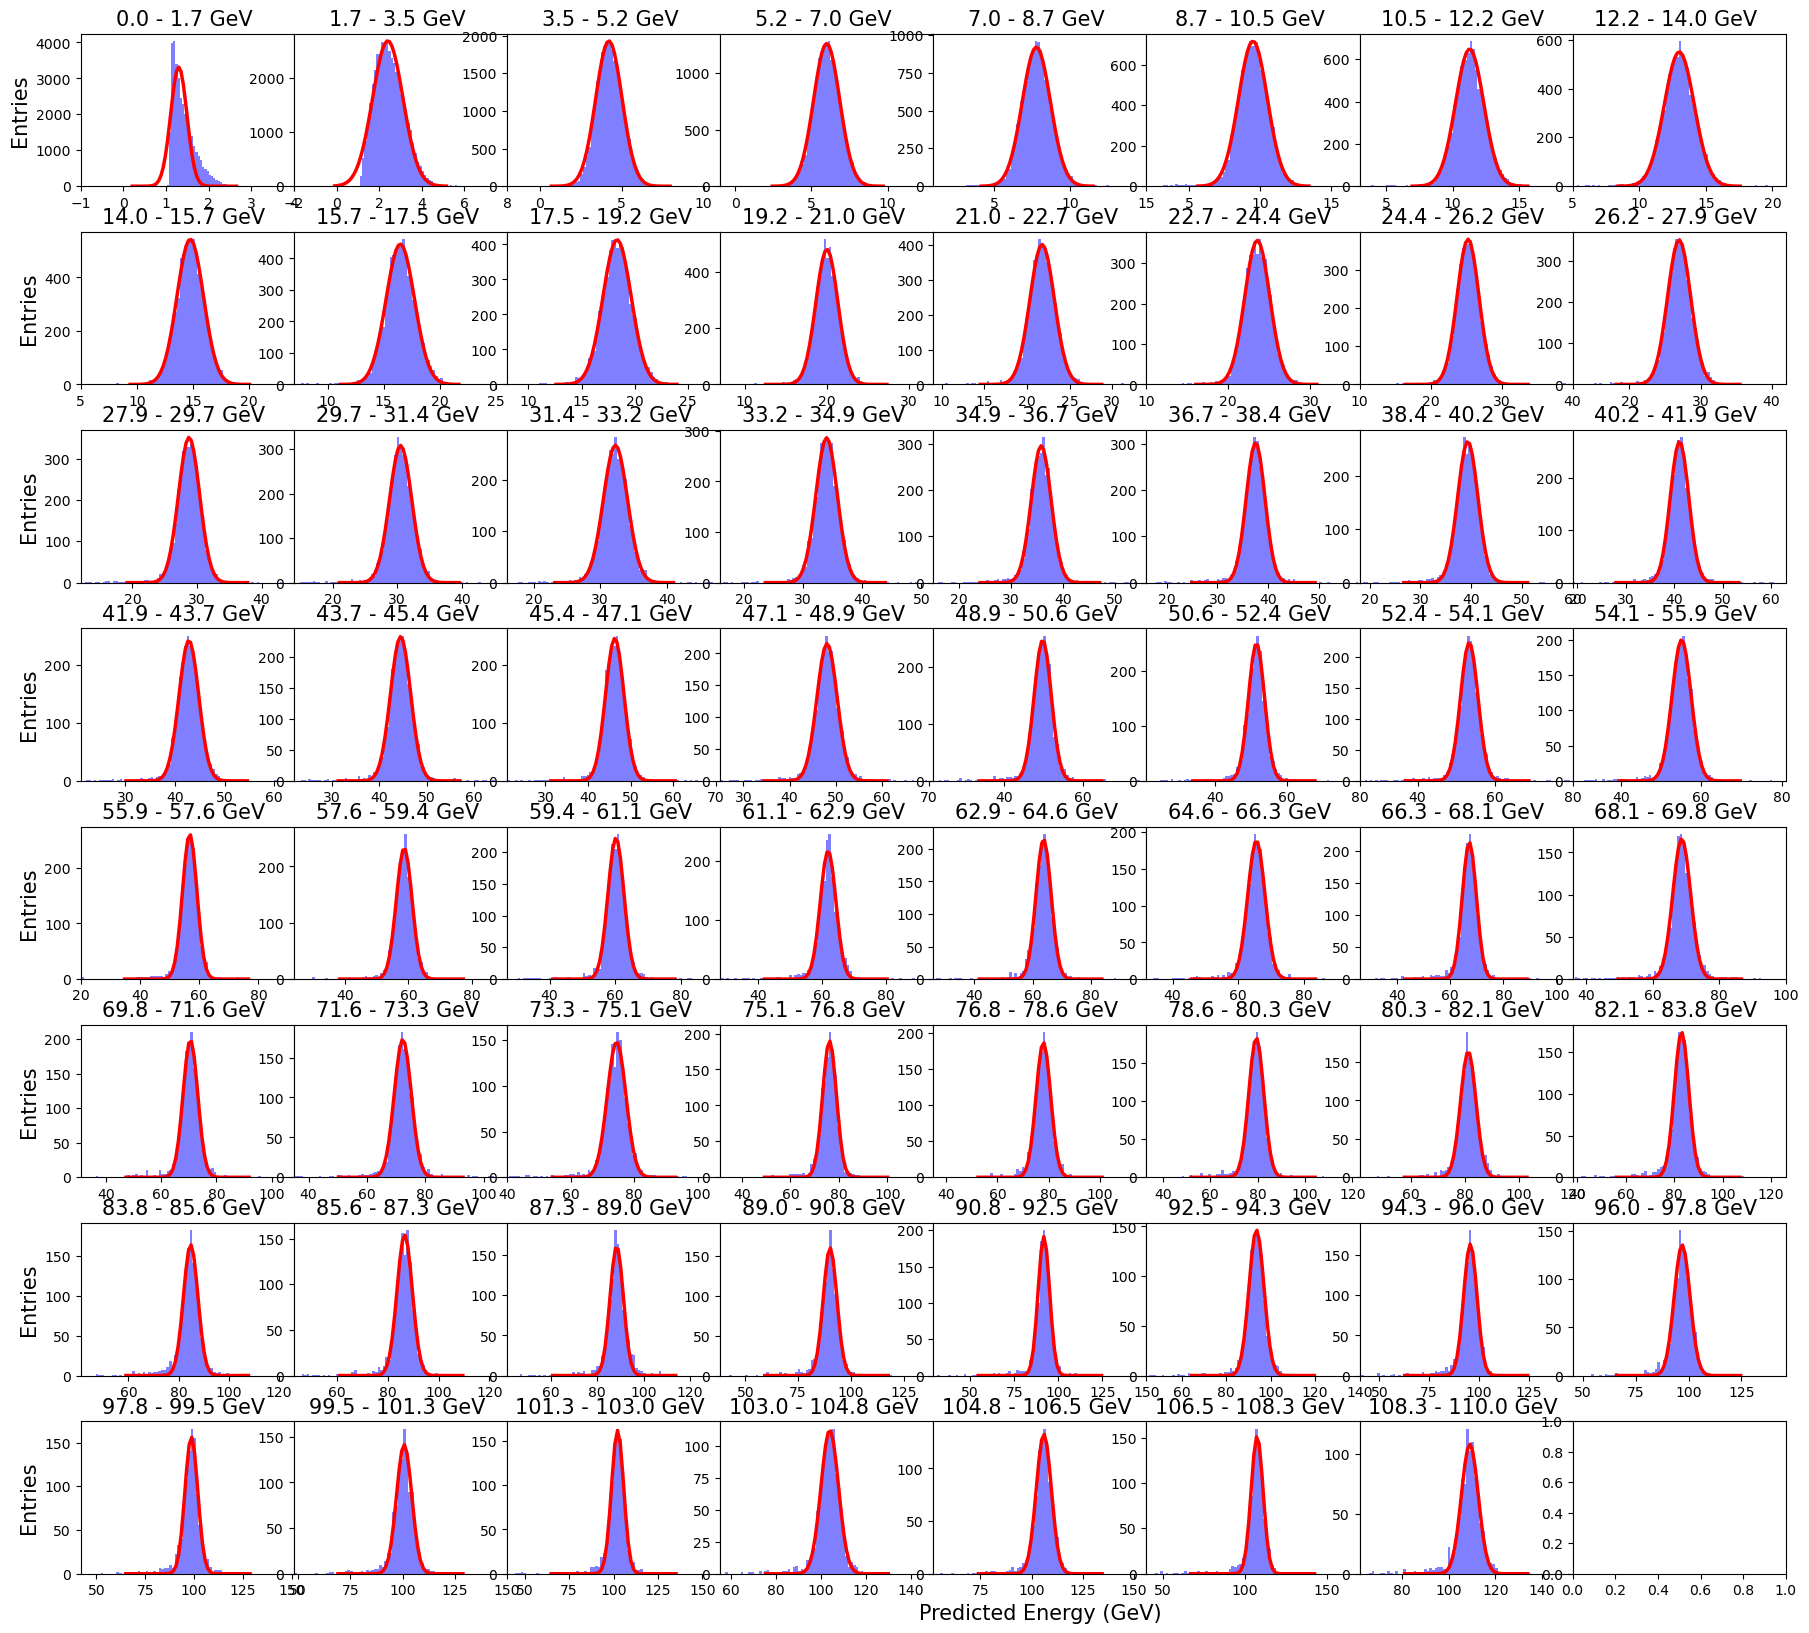

In [14]:
nbins=80

#approach='Graph_nets'
output_path= path
#detector='hcal'

min_val=0
max_val=110

Nbins=64

input_dim='1D'          ## Input features
latent_size=128          ## hyperparameter 
learning_rate='e3'      ## Learning rate 
#folder_used=3        ## number of folder used each folder is 100 Files
num_layer=4       ## hyper parameter num layers
data_type='continuous'
particle='pion' # or 'ele'  or pp  or pp_cut, or ele_cut, pp_cut_hcali, pp_cut_mse

binning = np.linspace(min_val, max_val, Nbins)

resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_median, median_scale_fit,\
slices_pred_truth,res_std_median, res_sigma_median = get_res_scale_fit_log10_log2(targets,predictions, binning, nbins, \
data_type, particle)

In [15]:
# Get Resolution, scale, and distributions of Pred/X in bins of truth
def get_res_scale(truth,pred,binning=np.linspace(0,100,21),label=""):

    if (len(truth) != len(pred)):
        print("truth and prediction arrays must be same length")
        return

    indecies = np.digitize(truth,binning)-1 #Get the bin number each element belongs to.
    N_Bins = len(binning)
    indecies[indecies==-1.] = 0.

    max_count = np.bincount(indecies).max()
    slices = np.empty((N_Bins,max_count))
    slices.fill(np.nan)
    scale_array = np.empty((N_Bins,max_count+1))
    scale_array.fill(np.nan)

    counter = np.zeros(N_Bins,int) #for getting mean from sum, and incrementing element number in bin
    avg_truth = np.zeros(N_Bins,float)


    for i in range(len(pred)):
        bin = indecies[i]
        slices[bin][counter[bin]] = pred[i] #slice_array[bin number][element number inside bin] = pred[i]
        counter[bin]+=1
        avg_truth[bin]+=truth[i]
        scale_array[bin][counter[bin]] = pred[i]/truth[i]

    #Resoluton = stdev(pred)/avg_truth 
    avg_truth = avg_truth/counter
    pred_stdev = np.nanstd(slices,axis=1)
    resolution = pred_stdev/avg_truth

    #Scale = <pred/truth>
    avg_scale  =   np.nanmean(scale_array,axis=-1)
    median_scale = np.nanmedian(scale_array,axis=-1)

    dict = {}
    dict["avg_truth"]    = avg_truth
    dict["resolution"]   = resolution
    dict["median_scale"] = median_scale
    dict["avg_scale"]    = avg_scale
    dict["slices"]       = slices
    dict["scale_array"]  = scale_array

    if (label != ""):
        with open(f'{label}/res_scale.pickle', 'wb') as pickle_file:
            pickle.dump(dict, pickle_file, protocol= -1)
            #pickle.dump(dict(_since_beginning), f, -1)

    return dict

In [16]:
detector='hcal' ## hcal 0r hcal_insert
particle='pp'   ## or ele ## pp
particle='pion'

nbins=30
approach = 'graphnet'
output_path= '/usr/workspace/sinha4/regressiononly/output'

NEvents_Max = 1_000_000 #OK if tree has less events than this

if particle=='pion':
    Energy_Bins = binning=np.linspace(0.,110,21) #Plotting
elif particle=='ele':
    Energy_Bins = binning=np.linspace(0.1,92,21) #Plotting

Do_Processing = False
Do_Training = True

NN = get_res_scale(targets,predictions,Energy_Bins,path)

print(NN.keys())
strawman=None

dict_keys(['avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])


In [17]:
get_res_scale

<function __main__.get_res_scale(truth, pred, binning=array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]), label='')>

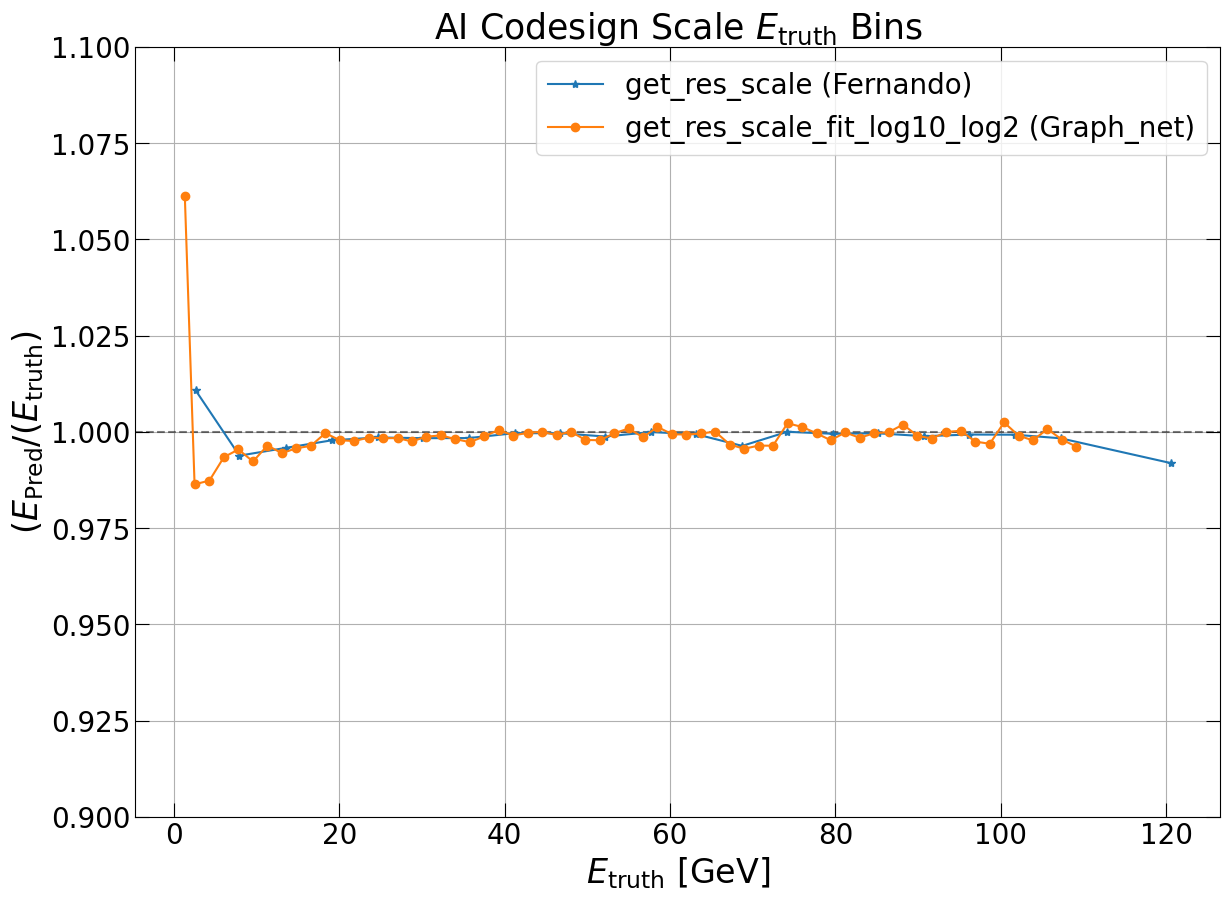

In [18]:
bin_label="truth"

ymin=0.9
ymax=1.10

fig=plt.figure(figsize=(14,10))
plt.title("AI Codesign Scale $E_\mathrm{%s}$ Bins"%(bin_label),fontsize=25)
plt.ylabel("$(E_\mathrm{Pred}/(E_\mathrm{%s})$"%(bin_label),fontsize=24)
plt.xlabel("$E_\mathrm{%s}$ [GeV]"%(bin_label) ,fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
plt.axhline(y=1.0, color='k', linestyle='--',alpha=0.5)#plt.ylim(-0.02,0.4)
plt.ylim(ymin,ymax)

ax = plt.subplot(1,1,1)
mask = ~np.isnan(NN["median_scale"])
first_bin = 0
last_bin = len(NN[f"avg_{bin_label}"][mask])

#NN   
plt.errorbar( NN[f"avg_{bin_label}"][mask][first_bin:last_bin] , NN["median_scale"][mask][first_bin:last_bin] ,
             marker='*',label='get_res_scale (Fernando)')
plt.errorbar(true_fit, median_scale_fit, label='get_res_scale_fit_log10_log2 (Graph_net)', marker='o')
plt.legend(fontsize=20)
plt.grid(True)


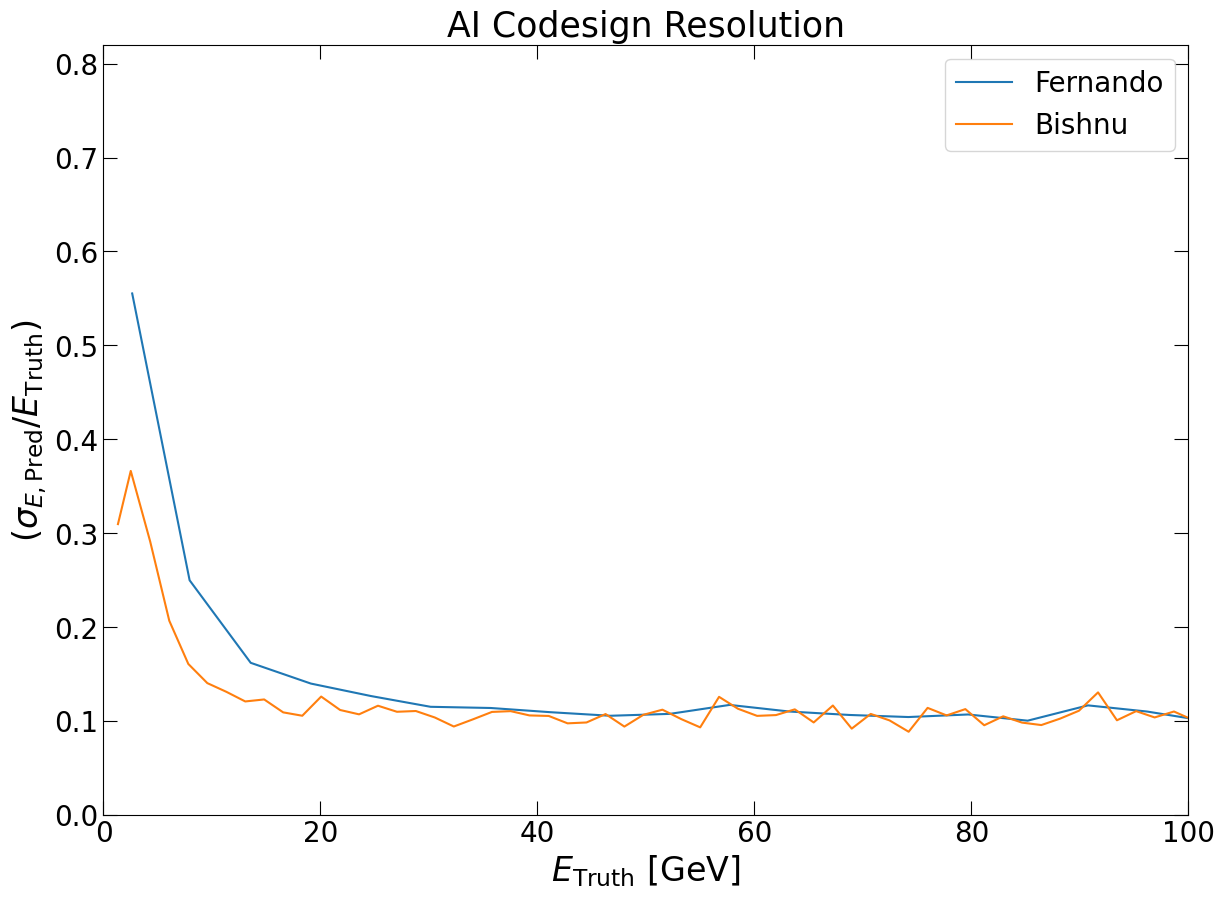

In [19]:
#def Plot_Resolutions(NN, strawman,label):
mask = ~np.isnan(NN["resolution"])
fig=plt.figure(figsize=(14,10))
plt.title("AI Codesign Resolution",fontsize=25)
plt.ylabel("$(\sigma_{E,\mathrm{Pred}}/E_\mathrm{Truth})$",fontsize=24)
plt.xlabel("$E_\mathrm{Truth}$ [GeV]",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
#plt.ylim(-0.02,0.4)
plt.ylim(0,2)
plt.ylim(0,.82)
plt.xlim(-1,100.01)
plt.xlim(0.0,100)
#errors = 1.0/(np.sqrt(2*counter-2))*stdev_pred
ax = plt.subplot(1,1,1)
first_bin = 0
last_bin = len(NN["avg_truth"])

#plt.text(0.8,-0.08,label,transform=ax.transAxes,fontsize=10)
plt.errorbar(NN["avg_truth"][mask][first_bin:last_bin],NN["resolution"][mask], label='Fernando')
plt.errorbar(true_fit,res_std_median, label='Bishnu')
plt.legend(fontsize=20)

In [9]:
loaded_dict = {} 
loaded_dict['1D_64_4_e3_3_continuous_pp'] = '/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230628_1228_concatTrue'
path=loaded_dict['1D_64_4_e3_3_continuous_pp']
print(path)

/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230628_1228_concatTrue


In [10]:
result_paths=[]

key = '1D_64_4_e3_3_continuous_pp'
path=loaded_dict[key]
result_paths.append(path)
result_paths.append(path)

print(result_paths) 

['/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230628_1228_concatTrue', '/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230628_1228_concatTrue']


In [11]:
def Plot_Loss_Curve(loss,val_loss,label,loss_string):

    fig,axes = plt.subplots(1,1,figsize=(14,10))
    axes = [axes,axes] #easier to add axes later, if need be
    axes[0].plot(loss,label="loss")
    axes[0].plot(val_loss,label="val_loss")
    axes[0].set_title('Model Loss vs. Epoch',fontsize=26)

    axes[0].set_ylabel(f'Loss ({loss_string})',fontsize=22)

    axes[0].set_xlabel('Epoch',fontsize=22)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    axes[0].set_xlim([-1,101])
    axes[0].set_ylim(0.06,0.125)
    
    axes[0].legend(['train', 'validation'], loc='upper right',fontsize=22)
    plt.savefig(f"{label}/ROOT_Correlation.png")

In [12]:
loaded_dict = {}
loaded_dict['1D_64_4_e3_3_continuous_pp'] = '/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230628_1228_concatTrue'
path=loaded_dict['1D_64_4_e3_3_continuous_pp']

npz_unpacked_loss = np.load(path+"/losses.npz")
loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']
Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],path,loss_string="MAE") #label loss yourself here

FileNotFoundError: [Errno 2] No such file or directory: '/usr/workspace/sinha4/regressiononly/savemodel3/Block_20230628_1228_concatTrue/losses.npz'

In [ ]:
take_log10 = False
path_to_result_dir= '/usr/workspace/sinha4/regressiononly/output'
npz_unpacked = np.load(path+"/test_predictions.npz")

predictions = npz_unpacked['outputs']
targets = npz_unpacked['targets']

means = pickle.load(open(f"{path_to_result_dir}/means.p", 'rb'), compression='gzip')
stdvs = pickle.load(open(f"{path_to_result_dir}/stdvs.p", 'rb'), compression='gzip')

print(means)

means.keys()

predictions = predictions*stdvs['genP'] + means['genP']
targets = targets*stdvs['genP'] + means['genP']

predictions = 10**predictions
targets = 10**targets


ClusterSum = predictions
GenP = targets

In [ ]:
ClusterSum_vs_GenP(ClusterSum, GenP, path, take_log10)

In [ ]:
nbins=80

#approach='Graph_nets'
output_path= path
#detector='hcal'

min_val=0
max_val=110

Nbins=64

input_dim='1D'          ## Input features
latent_size=128          ## hyperparameter 
learning_rate='e3'      ## Learning rate 
#folder_used=3        ## number of folder used each folder is 100 Files
num_layer=4       ## hyper parameter num layers
data_type='continuous'
particle='pion' # or 'ele'  or pp  or pp_cut, or ele_cut, pp_cut_hcali, pp_cut_mse

binning = np.linspace(min_val, max_val, Nbins)

resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_median, median_scale_fit,\
slices_pred_truth,res_std_median, res_sigma_median = get_res_scale_fit_log10_log2(targets,predictions, binning, nbins, \
data_type, particle)

In [ ]:
detector='hcal' ## hcal 0r hcal_insert
particle='pp'   ## or ele ## pp
particle='pion'

nbins=30
approach = 'graphnet'
output_path= '/usr/workspace/sinha4/regressiononly/output'

NEvents_Max = 1_000_000 #OK if tree has less events than this

if particle=='pion':
    Energy_Bins = binning=np.linspace(0.,110,21) #Plotting
elif particle=='ele':
    Energy_Bins = binning=np.linspace(0.1,92,21) #Plotting

Do_Processing = False
Do_Training = True

NN = get_res_scale(targets,predictions,Energy_Bins,path)

print(NN.keys())
strawman=None